## Students Performance  Indicator

###  Life cycle of Machine learning Project
    

   + Understanding the Problem Statement
   + Data Collection
   + Data Checks to perform
   + Exploratory data analysis
   + Data Pre-Processing
   + Model Training
   + Choose best model

### 1) Problem statement






+ This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection

+ Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
+ The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

+ Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('data/stud.csv')

#### Data Analysis

In [9]:
data.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
774,male,group B,some college,standard,none,66,65,60
225,female,group E,master's degree,free/reduced,none,45,56,54
663,female,group C,high school,standard,none,65,69,67
67,female,group C,some college,standard,none,60,72,74
847,male,group D,high school,standard,none,64,54,50


### 2.2 Dataset information

+ gender : sex of students -> (Male/female)
+ race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
+ parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
+ lunch : having lunch before test (standard or free/reduced)
+ test preparation course : complete or not complete before test
+ math score
+ reading score
+ writing score

### 3. Data Checks to perform

+ Understanding data Distribution
+ Check Missing values
+ Check Duplicates
+ Check data type
+ Check the number of unique values of each column
+ Check statistics of data set
+ Check various categories present in the different categorical column

#### Understanding data

In [10]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

+ Mean and Median values are slightly same, it means data is normally distributed for numerical values (math-score, reading_score, writing_score)
+ Dataset dosen't holds NaN values for numerical features
+ the standard deviation values of 15 for math_score and writing_score and 14.6 for writing_score indicate a moderate spread.

In [11]:
data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

+ Dataset holds 5 categorical features and 3 numerical features

In [12]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

data.duplicated().sum()

+ Dataset doesn't have null and duplicate values

### Separates the categorical and numerical features

In [13]:
categorical = [column for column in data.columns if data[column].dtypes == 'O']

In [14]:
categorical

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [15]:
numerical = [column for column in data.columns if data[column].dtypes != 'O']

In [16]:
numerical

['math_score', 'reading_score', 'writing_score']

### Check the unique values in categorical data

In [17]:

def get_unique_values(dataset,list_of_values):
    for value in list_of_values:
        uni = dataset[value].unique()
        print("Unique values of {} are {} \n ".format(value,uni))

In [18]:
get_unique_values(data,categorical)

Unique values of gender are ['female' 'male'] 
 
Unique values of race_ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E'] 
 
Unique values of parental_level_of_education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 
 
Unique values of lunch are ['standard' 'free/reduced'] 
 
Unique values of test_preparation_course are ['none' 'completed'] 
 


### Univariate Analysis


#### Check the worst and best performance of students w.r.t subject

In [19]:
data.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
803,female,group B,some college,standard,none,82,85,87
429,male,group C,some high school,free/reduced,none,68,63,54


In [20]:
maths = data[data['math_score'] == 100]['math_score']
reading= data[data['reading_score'] == 100]['reading_score']
writing = data[data['writing_score'] == 100]['writing_score']
print("The number of {} students got 100 marks in maths".format(maths.count()))
print("The number of {} students got 100 reading in maths".format(reading.count()))
print("The number of {} students got 100 writing in maths".format(writing.count()))

The number of 7 students got 100 marks in maths
The number of 17 students got 100 reading in maths
The number of 14 students got 100 writing in maths


In [21]:
maths_fail = data[data['math_score'] < 35 ]['math_score'].count()
reading_fail= data[data['reading_score'] < 35]['reading_score'].count()
writing_fail = data[data['writing_score'] < 35]['writing_score'].count()
print("The number of {} students got fail in maths".format(maths_fail))
print("The number of {} students got fail reading in maths".format(reading_fail))
print("The number of {} students got fail writing in maths".format(writing_fail))

The number of 22 students got fail in maths
The number of 15 students got fail reading in maths
The number of 17 students got fail writing in maths


+ students are performed worst in math subject where 22 students got failed and performed best in reading as 17 students get 100 marks

#### Get the count and information of students who got 100 marks in each subject

In [22]:
# Assuming 'data' is your DataFrame
count_perfect_scores = data[((data['math_score'] == 100) & (data['reading_score'] == 100) & (data['writing_score'] == 100))].count()


In [23]:
count_perfect_scores 

gender                         3
race_ethnicity                 3
parental_level_of_education    3
lunch                          3
test_preparation_course        3
math_score                     3
reading_score                  3
writing_score                  3
dtype: int64

In [24]:
perfect_scores = data[(data['math_score'] == 100) & (data['reading_score'] == 100) & (data['writing_score'] == 100)]

# select specific columns for these students using loc:
selected_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

result = perfect_scores.loc[:, selected_columns]


In [25]:
result

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
458,female,group E,bachelor's degree,standard,none
916,male,group E,bachelor's degree,standard,completed
962,female,group E,associate's degree,standard,none


#### Insight

+ The total 3 number of students got full 100 marks
+ In 3 students 3 are females and 1 is male. It looks like gender is not much depended on students performance
+ In 3 students 2 student's patental education is bachelor's degree and 1 students's parental education is associate's degree
+ Parental's education slighly depend on student's performace
+ The lunch type and race_ethnicity these two features are highly depended on students performance

#### get count and details for students who got failed in all subject

In [26]:
failed_data = data[(data['math_score'] < 35) & (data['reading_score'] < 35) & (data['writing_score'] < 35)]

# select specific columns for these students using loc:
columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

fail_result = failed_data.loc[:, selected_columns]

In [27]:
fail_result

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
17,female,group B,some high school,free/reduced,none
59,female,group C,some high school,free/reduced,none
76,male,group E,some high school,standard,none
327,male,group A,some college,free/reduced,none
363,female,group D,some high school,free/reduced,none
596,male,group B,high school,free/reduced,none
601,female,group C,high school,standard,none
980,female,group B,high school,free/reduced,none


In [28]:
failed_data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
327,male,group A,some college,free/reduced,none,28,23,19
363,female,group D,some high school,free/reduced,none,27,34,32
596,male,group B,high school,free/reduced,none,30,24,15
601,female,group C,high school,standard,none,29,29,30
980,female,group B,high school,free/reduced,none,8,24,23


#### Insight

+ Total 8 number of students got failed where 5 students are female  and 3 are male
+ Gender and race_ethenicity not much depended on students performace
+ parental_level_of_education is depended on student performace. students who got failed their parents education comes under high school and some college
+ Lunch slightly depends on students performance
+ test preparation have high impact on student performace


#### Find out Min ,Max, Avg marks in each subject w.r.t gender

In [29]:
def get_details(dataset, column: str, value: str,sub_score):
    # Filter the dataset for the specified value in the given column
    filtered_data = dataset[dataset[column] == value]
    
    print("minimum value for {} is {}".format(value, filtered_data[sub_score].min()))
    print("maximum value for {} is {}".format(value, filtered_data[sub_score].max()))
    print("average value for {} is {}".format(value, filtered_data[sub_score].mean()))


In [30]:
get_details(data,"gender","male","math_score")

minimum value for male is 27
maximum value for male is 100
average value for male is 68.72821576763485


In [31]:
get_details(data,"gender","female","math_score")

minimum value for female is 0
maximum value for female is 100
average value for female is 63.633204633204635


In [32]:
get_details(data,"gender","male","reading_score")

minimum value for male is 23
maximum value for male is 100
average value for male is 65.47302904564316


In [33]:
get_details(data,"gender","female","reading_score")

minimum value for female is 17
maximum value for female is 100
average value for female is 72.60810810810811


In [34]:
get_details(data,"gender","male","writing_score")

minimum value for male is 15
maximum value for male is 100
average value for male is 63.31120331950208


In [35]:
get_details(data,"gender","female","writing_score")

minimum value for female is 10
maximum value for female is 100
average value for female is 72.46718146718146


In [36]:
data['total'] = data['math_score'] + data['reading_score'] + data['writing_score']

In [37]:
data.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total
500,female,group D,master's degree,standard,none,74,79,82,235
409,male,group D,associate's degree,standard,completed,87,84,85,256
812,female,group C,master's degree,standard,completed,54,64,67,185
437,male,group D,associate's degree,free/reduced,none,75,66,73,214
207,male,group E,high school,standard,completed,81,80,76,237


In [38]:
male_data = data[data['gender']=="male"]

In [39]:
male_data.describe()

,math_score,reading_score,writing_score,total
count,482.000000,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203,197.512448
std,14.356277,13.931832,14.113832,41.096520
min,27.000000,23.000000,15.000000,69.000000
25%,59.000000,56.000000,53.000000,168.000000
50%,69.000000,66.000000,64.000000,199.000000
75%,79.000000,75.000000,73.750000,228.750000
max,100.000000,100.000000,100.000000,300.000000


In [40]:
female_data = data[data['gender']=="female"]

In [41]:
female_data.describe()

,math_score,reading_score,writing_score,total
count,518.000000,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181,208.708494
std,15.491453,14.378245,14.844842,43.625427
min,0.000000,17.000000,10.000000,27.000000
25%,54.000000,63.250000,64.000000,182.000000
50%,65.000000,73.000000,74.000000,211.000000
75%,74.000000,83.000000,82.000000,236.000000
max,100.000000,100.000000,100.000000,300.000000


In [42]:
data.describe()

,math_score,reading_score,writing_score,total
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [43]:
female_data[female_data['math_score']==0]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total
59,female,group C,some high school,free/reduced,none,0,17,10,27


In [44]:
female_data[female_data['reading_score']== 17]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total
59,female,group C,some high school,free/reduced,none,0,17,10,27


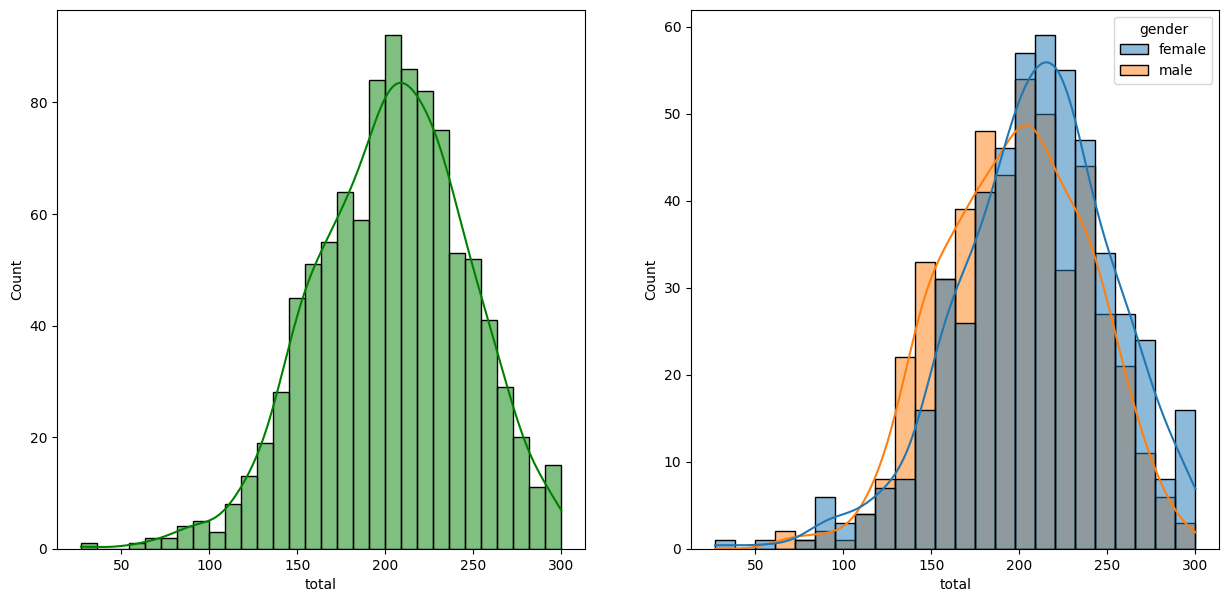

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='total',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='total',kde=True,hue='gender')
plt.show()

#### Insight

+ 1 female student got min makrs in all subject
+ We have more female data than male data
+ There are around 50 male students holds 197 average marks
+ There are around 55 female students holds 208 average marks
+ male students performing well in marks range between 100-180 than female students
+ female students performing well in marks range around 180-300 than male students

In [46]:
### Worst performance
# Filter the data for students who performed poorly in each subject
math_data = data[data['math_score'] <35]
reading_data = data[data['reading_score'] < 35]
writing_data = data[data['writing_score'] <35]

# Count the number of males and females in each filtered data
math_counts = math_data.groupby('gender')['gender'].count()
reading_counts = reading_data.groupby('gender')['gender'].count()
writing_counts = writing_data.groupby('gender')['gender'].count()

print("The number of students who perform worst in math subject are {} where count of male is {} and female is {}."
      .format(math_data['gender'].count(), math_counts.get('male'), math_counts.get('female')))

print("The number of students who perform worst in reading subject are {} where count of male is {} and female is {}."
      .format(reading_data['gender'].count(), reading_counts.get('male'), reading_counts.get('female')))

print("The number of students who perform worst in writing subject are {} where count of male is {} and female is {}."
      .format(writing_data['gender'].count(), writing_counts.get('male'), writing_counts.get('female')))


The number of students who perform worst in math subject are 22 where count of male is 4 and female is 18.
The number of students who perform worst in reading subject are 15 where count of male is 8 and female is 7.
The number of students who perform worst in writing subject are 17 where count of male is 8 and female is 9.


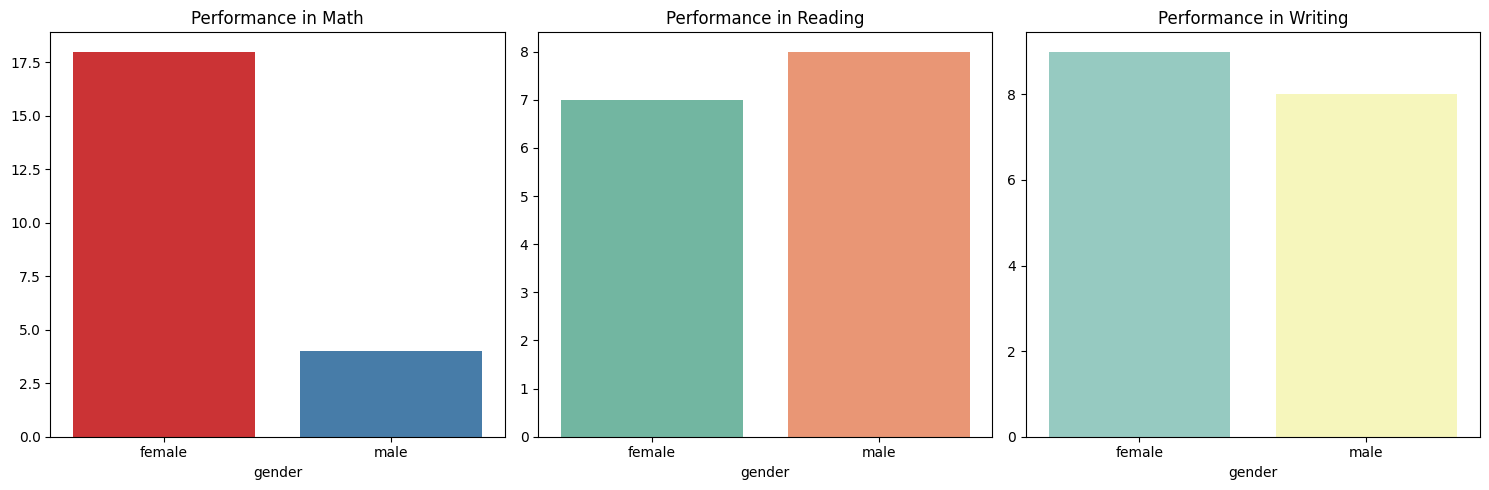

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create bar plots using Seaborn
sns.barplot(x=math_counts.index, y=math_counts.values, palette="Set1", ax=axes[0])
axes[0].set_title("Performance in Math")

sns.barplot(x=reading_counts.index, y=reading_counts.values, palette="Set2", ax=axes[1])
axes[1].set_title("Performance in Reading")

sns.barplot(x=writing_counts.index, y=writing_counts.values, palette="Set3", ax=axes[2])
axes[2].set_title("Performance in Writing")

plt.tight_layout()
plt.show()


In [48]:
### best performance
# Filter the data for students who performed poorly in each subject
math_data = data[(data['math_score'] >= 70) & (data['math_score'] <= 100)]
reading_data = data[(data['reading_score'] >= 70) & (data['reading_score'] <= 100)]
writing_data = data[(data['writing_score'] >= 70) & (data['writing_score'] <= 100)]

# Count the number of males and females in each filtered data
math_counts = math_data.groupby('gender')['gender'].count()
reading_counts = reading_data.groupby('gender')['gender'].count()
writing_counts = writing_data.groupby('gender')['gender'].count()

print("The number of students who perform best in math subject are {} where count of male is {} and female is {}."
      .format(math_data['gender'].count(), math_counts.get('male'), math_counts.get('female')))

print("The number of students who perform best in reading subject are {} where count of male is {} and female is {}."
      .format(reading_data['gender'].count(), reading_counts.get('male'), reading_counts.get('female')))

print("The number of students who perform best in writing subject are {} where count of male is {} and female is {}."
      .format(writing_data['gender'].count(), writing_counts.get('male'), writing_counts.get('female')))

The number of students who perform best in math subject are 409 where count of male is 231 and female is 178.
The number of students who perform best in reading subject are 513 where count of male is 195 and female is 318.
The number of students who perform best in writing subject are 489 where count of male is 164 and female is 325.


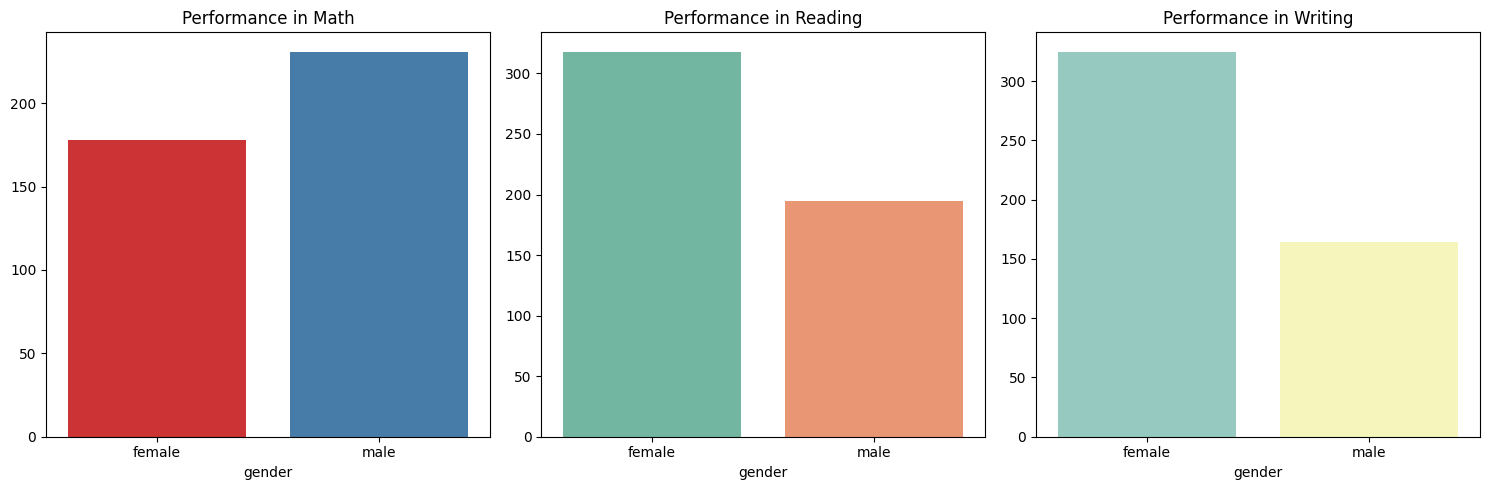

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create bar plots using Seaborn
sns.barplot(x=math_counts.index, y=math_counts.values, palette="Set1", ax=axes[0])
axes[0].set_title("Performance in Math")

sns.barplot(x=reading_counts.index, y=reading_counts.values, palette="Set2", ax=axes[1])
axes[1].set_title("Performance in Reading")

sns.barplot(x=writing_counts.index, y=writing_counts.values, palette="Set3", ax=axes[2])
axes[2].set_title("Performance in Writing")

plt.tight_layout()
plt.show()

#### Insight

+ male students have greate performance in math subject than female students
+ female students have greate performance in reading and writing subject than male students

In [50]:
data['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [51]:
lunch_gender = data.groupby(['lunch','gender']).size().unstack()

In [52]:
lunch_gender

gender,female,male
lunch,,
free/reduced,189,166
standard,329,316


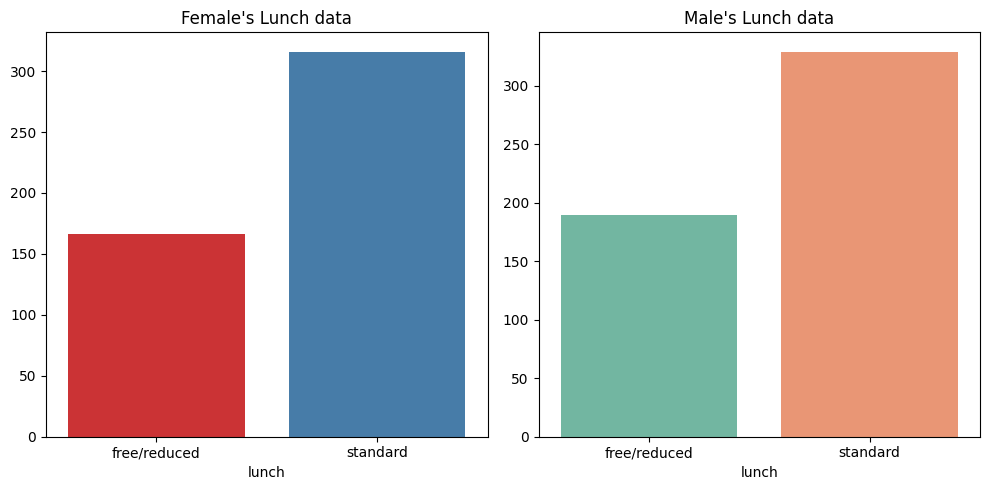

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create bar plots using Seaborn
sns.barplot(x=lunch_gender.index, y=lunch_gender['male'].values, palette="Set1", ax=axes[0])
axes[0].set_title("Female's Lunch data")

sns.barplot(x=lunch_gender.index, y=lunch_gender['female'].values, palette="Set2", ax=axes[1])
axes[1].set_title("Male's Lunch data")

plt.tight_layout()
plt.show()

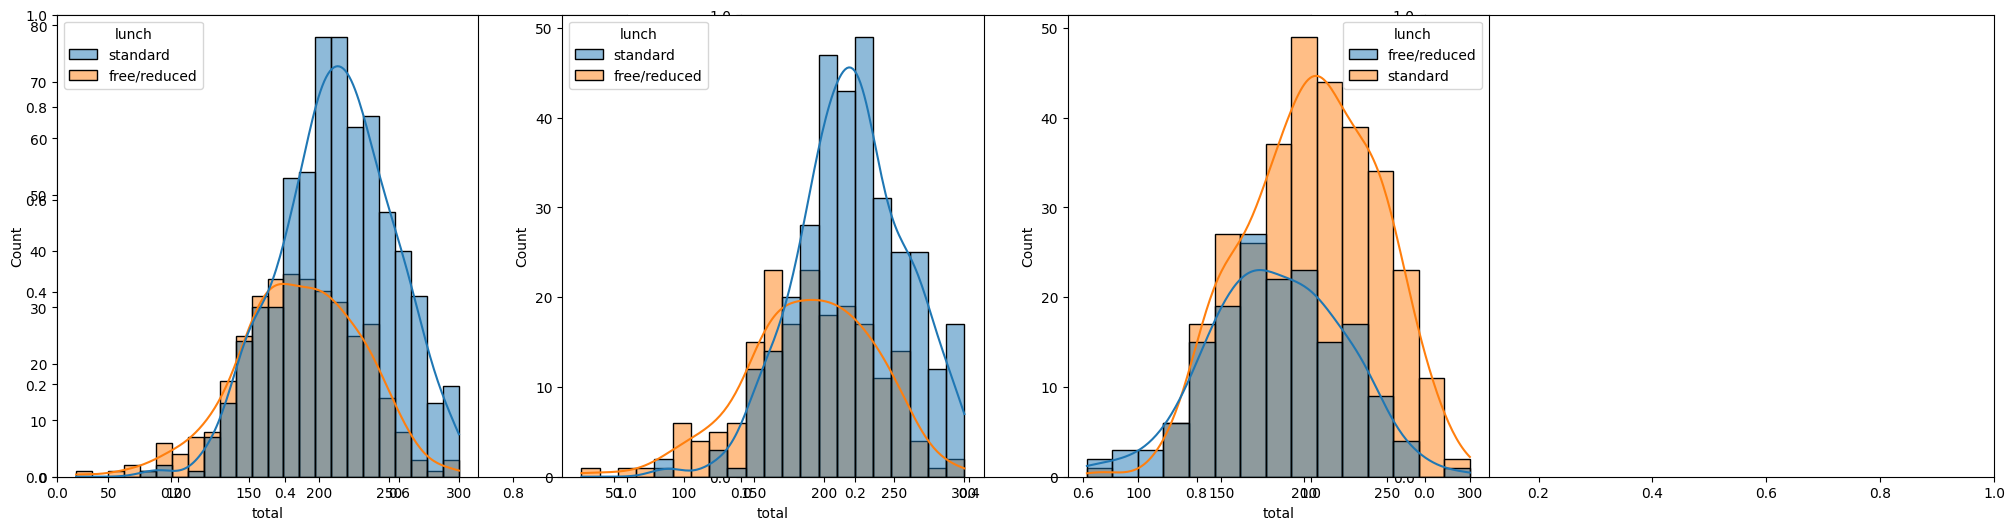

In [54]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='total',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='total',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='total',kde=True,hue='lunch')
plt.show()

#### Insight

+ most of male and female students preferred standard lunch
+ standard lunch helps in increasing students performance

In [55]:

data['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

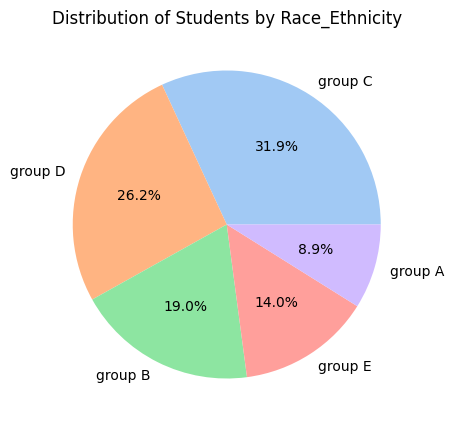

In [56]:
fig = plt.figure(figsize =(7,5))
sns.set_palette("pastel")
plt.pie(data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,autopct='%1.1f%%')
plt.title("Distribution of Students by Race_Ethnicity")
plt.show()

In [57]:
race_gender =data.groupby(['race_ethnicity', 'gender']).size().unstack()

In [58]:
race_gender

gender,female,male
race_ethnicity,,
group A,36,53
group B,104,86
group C,180,139
group D,129,133
group E,69,71


In [59]:
# Print the results
for ethnicity, counts in race_gender.iterrows():
    total = counts.sum()
    print(f"The number of students belongs to {ethnicity} are {total} where "
          f"female students are {counts['female']} and male are {counts['male']}.")

The number of students belongs to group A are 89 where female students are 36 and male are 53.
The number of students belongs to group B are 190 where female students are 104 and male are 86.
The number of students belongs to group C are 319 where female students are 180 and male are 139.
The number of students belongs to group D are 262 where female students are 129 and male are 133.
The number of students belongs to group E are 140 where female students are 69 and male are 71.


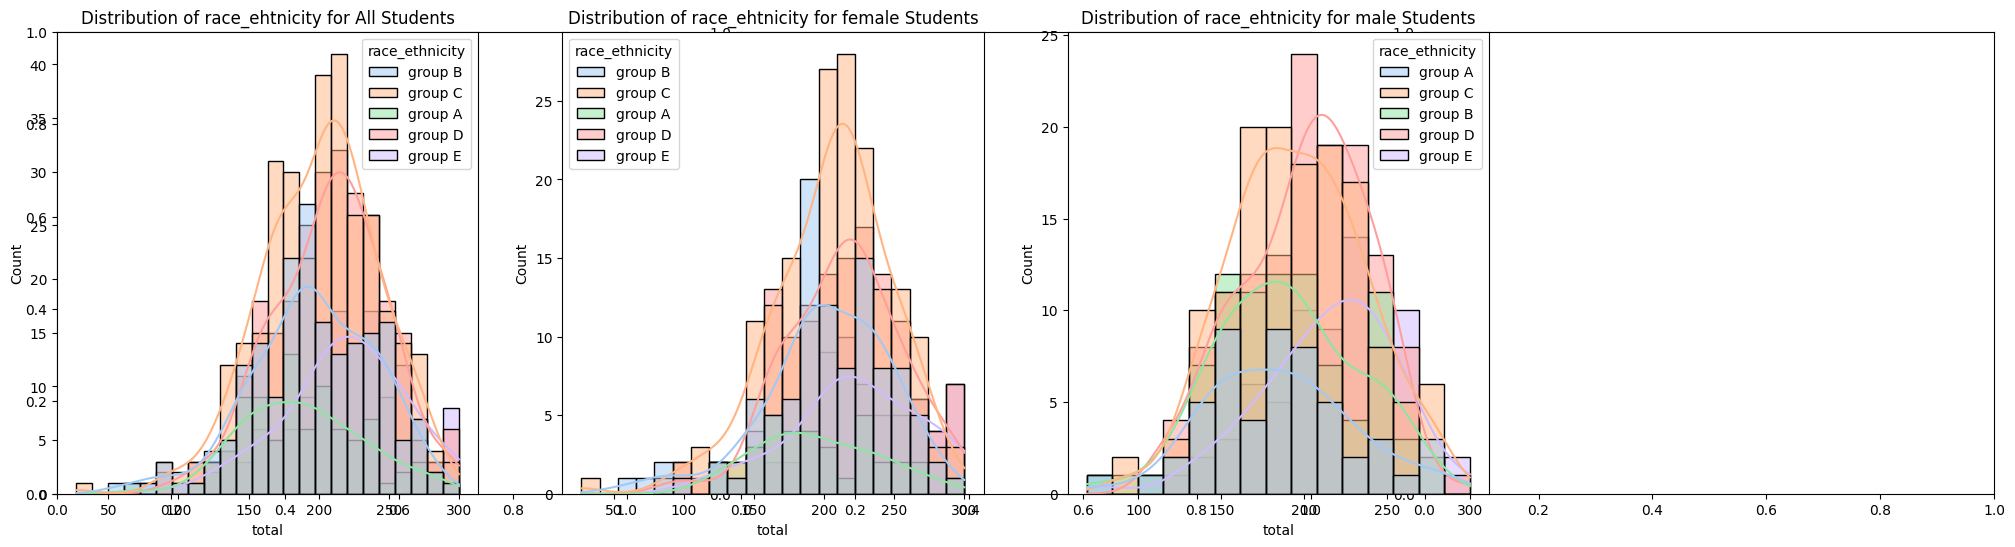

In [60]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='total',kde=True,hue='race_ethnicity')
plt.title(f"Distribution of race_ehtnicity for All Students")
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='female'],x='total',kde=True,hue='race_ethnicity')
plt.title(f"Distribution of race_ehtnicity for female Students")
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='male'],x='total',kde=True,hue='race_ethnicity')
plt.title(f"Distribution of race_ehtnicity for male Students")
plt.show()

#### Insight

+ Most of the students belogs to C and D group
+ The students whose belongs to C and D group, have better performance in exam

In [61]:
data['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [62]:

parental_education_gender =data.groupby(['parental_level_of_education', 'gender']).size().unstack()

In [63]:
parental_education_gender

gender,female,male
parental_level_of_education,,
associate's degree,116,106
bachelor's degree,63,55
high school,94,102
master's degree,36,23
some college,118,108
some high school,91,88


In [64]:
for education, keys in parental_education_gender.iterrows():
    count = keys.sum()
    print("""The total parental level education of {} is {} where female students are {} and male students are {}  \n"""
          .format(education,count,keys['female'],keys['male']))

The total parental level education of associate's degree is 222 where female students are 116 and male students are 106  

The total parental level education of bachelor's degree is 118 where female students are 63 and male students are 55  

The total parental level education of high school is 196 where female students are 94 and male students are 102  

The total parental level education of master's degree is 59 where female students are 36 and male students are 23  

The total parental level education of some college is 226 where female students are 118 and male students are 108  

The total parental level education of some high school is 179 where female students are 91 and male students are 88  



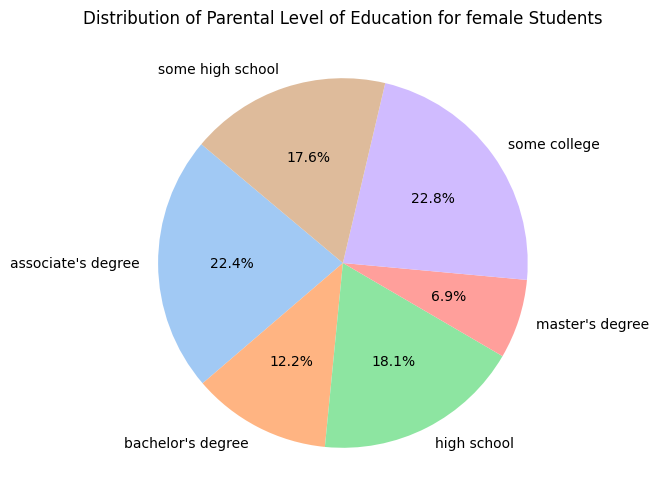

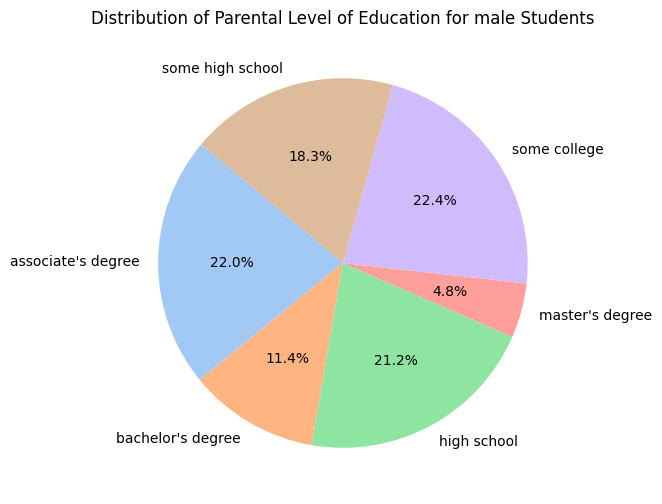

In [65]:
for gender in ['female', 'male']:
    plt.figure(figsize=(6, 6))
    sns.set_palette("pastel")
    plt.pie(parental_education_gender[gender], labels=parental_education_gender.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Distribution of Parental Level of Education for {gender} Students")
    plt.show()

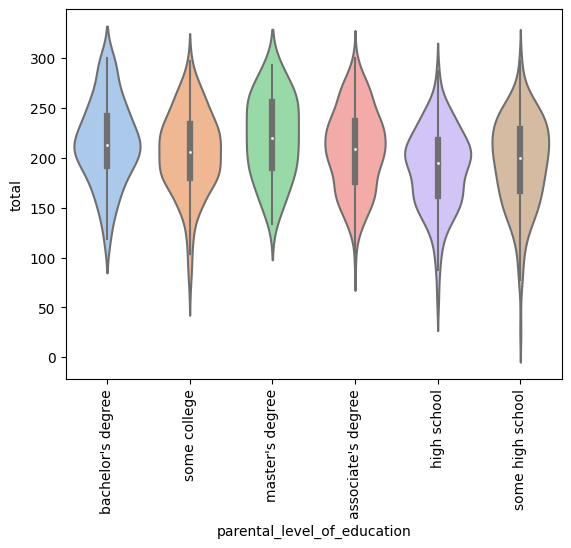

In [66]:
sns.violinplot(x='parental_level_of_education', y='total', data=data)
plt.xticks(rotation=90)
plt.show()

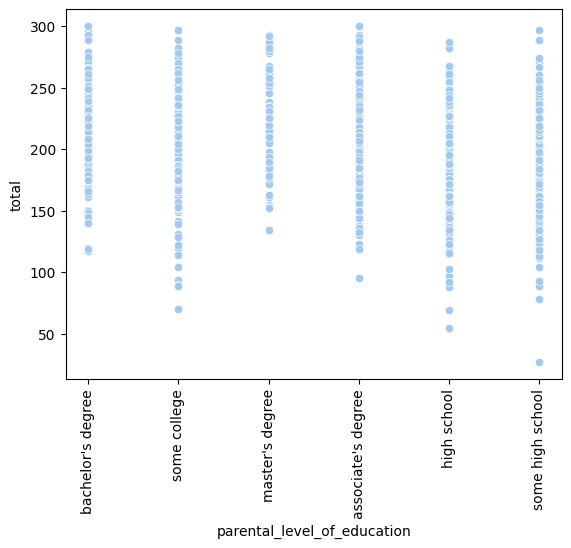

In [67]:
sns.scatterplot(y='total', x='parental_level_of_education', data=data)
plt.xticks(rotation=90)
plt.show()

#### Insight

+ Most of student's parents education comes under 'some college', 'Associate degree' and 'high school'
+ There is very less count of students whose parents education comes under master degree
+ The student whose parents possess master and bachelor level education are secured higher score than others
+ The students whose parents education comes under "Associate Degree" are secured failry secured great score


In [68]:
data['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [69]:
course_gender = data.groupby(['test_preparation_course','gender']).size().unstack()

In [70]:
course_gender

gender,female,male
test_preparation_course,,
completed,184,174
none,334,308


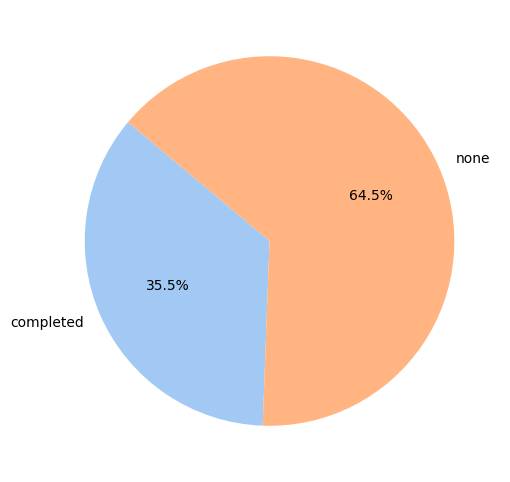

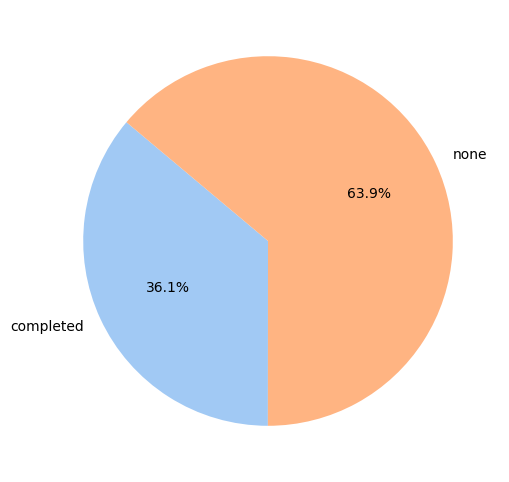

In [72]:
for gender in ['female', 'male']:
    plt.figure(figsize=(6, 6))
    sns.set_palette("pastel")
    plt.pie(course_gender[gender], labels=course_gender.index, autopct='%1.1f%%', startangle=140)
    plt.show()

Text(0.5, 1.0, 'students performance in writng')

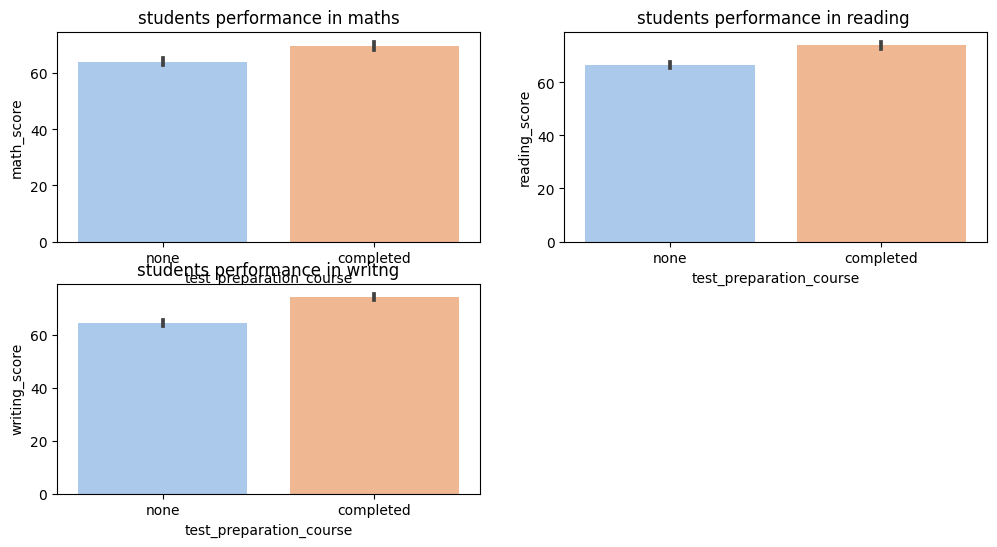

In [73]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (y=data['math_score'], x =data['test_preparation_course'])
plt.title(f"students performance in maths")
plt.subplot(2,2,2)
sns.barplot (y=data['reading_score'], x=data['test_preparation_course'])
plt.title(f"students performance in reading ")
plt.subplot(2,2,3)
sns.barplot (y=data['writing_score'], x=data['test_preparation_course'])
plt.title(f"students performance in writng")


#### Insight

+ Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### CHECKING OUTLIERS

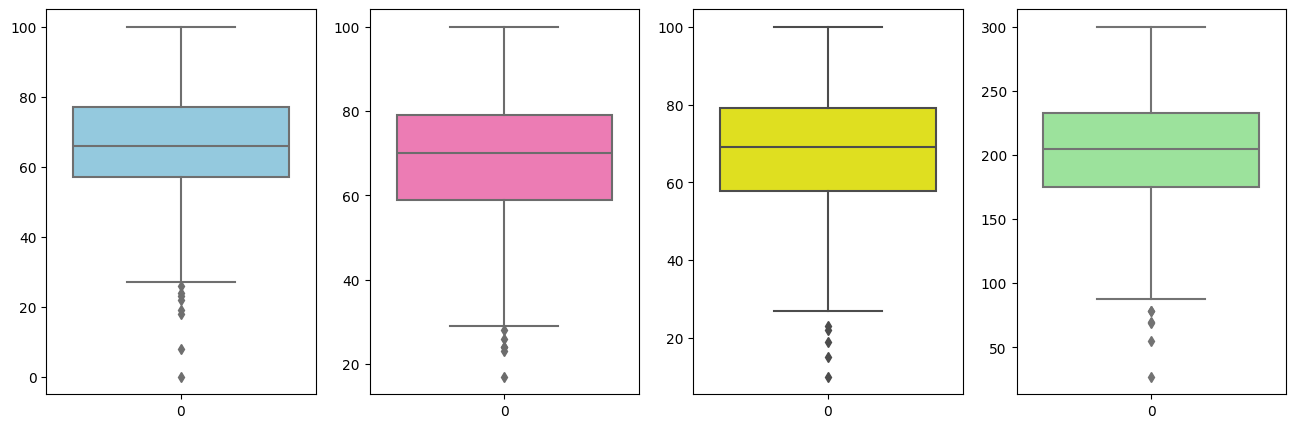

In [74]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['total'],color='lightgreen')
plt.show()

#### Insight

+ we have outliers in All three subjects, where in maths we have more outliers

###  MUTIVARIATE ANALYSIS USING PAIRPLOT

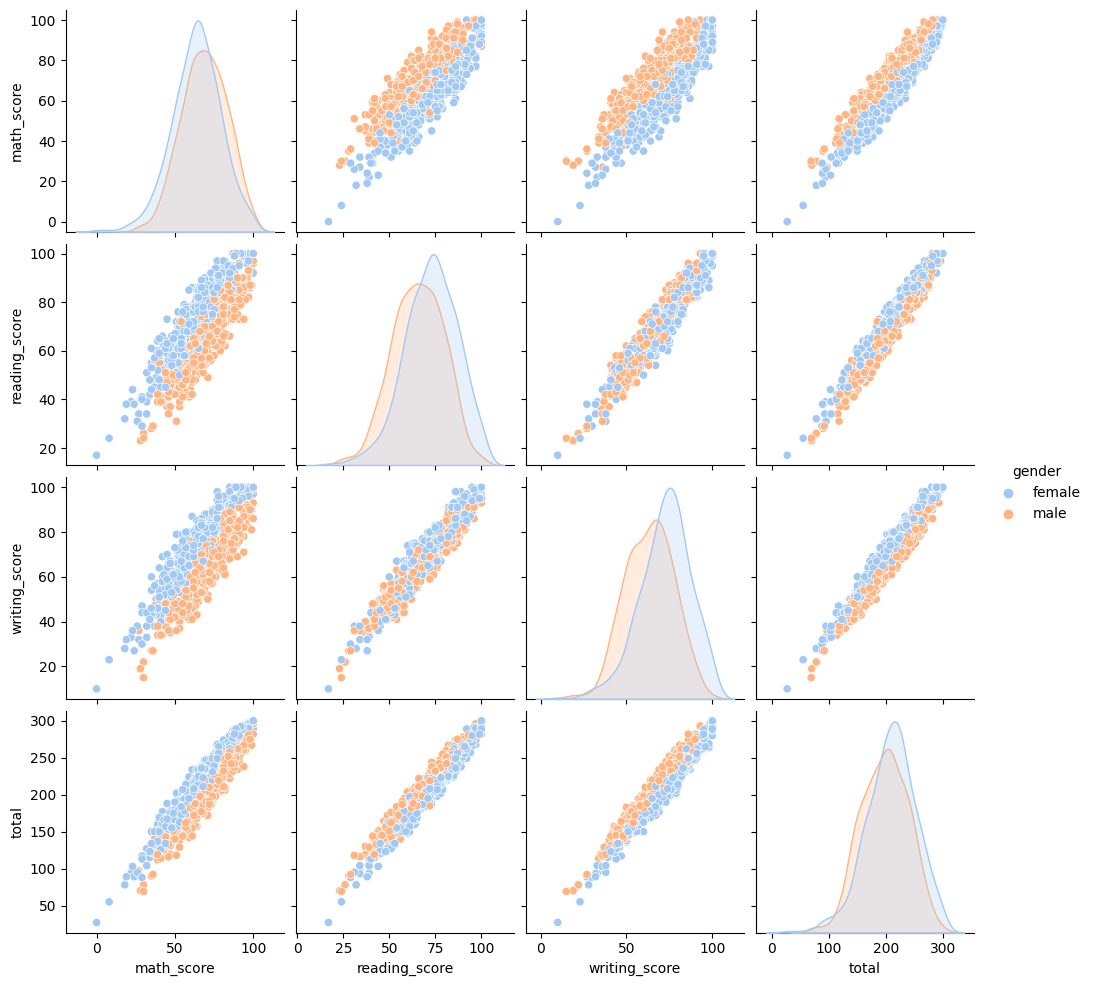

In [75]:
sns.pairplot(data,hue = 'gender')
plt.show()

#### Insight

+ From the above plot it is clear that all the scores increase linearly with each other.

### Conclusion

+ Data is normally distributed
+ The count of students getting 100 marks is less in math subject, whereas in other two subjects reading and writing have good count of getting 100 marks
+ 3 students got 100 marks in each subject in that 2 are female students and 1 is male student
+ Total 8 number of students got failed where 5 students are female  and 3 are male
+ One female student had very bad performace in exam, due to that there is outlier in female data
+ Female students performinf well than Male studens [In marks range between 100-180 male students performaning well, than female students, and marks range around 180-300 female students performing wellthan male students]
+ female students have greate performance in reading and writing subject than male students
+ male students have greate performance in math subject than female students
+ most of male and female students preferred standard lunch
+ standard lunch helps in increasing students performance
+ race_ethenicity have good impact on students perfromance as Most of the students belogs to C and D group and the students whose belongs to C and D group, have better performance in exam
+ Parents education help in students performance as the student whose parents possess master and bachelor level education are secured higher score than others
+ Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course